#### Import Required Packages

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Creating Linearly Separable Dataset

In [255]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[:, 4].values
y_sample = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
x_sample = df.iloc[:, [0,2]].values

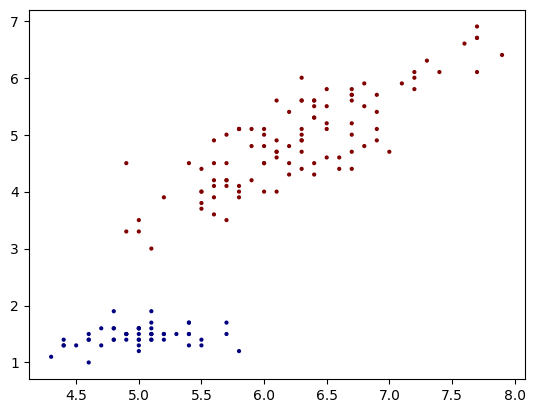

In [256]:
# plot the data
plt.scatter(x_sample[:, 0], x_sample[:, 1], c=y_sample, cmap='jet', s=4)

#### Develop Single Layer Perceptron 

In [257]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [258]:
ppn = Perceptron(epochs=100, eta=0.1)
ppn.fit(x_sample, y_sample)
print(ppn.w_)

[-0.4  -0.68  1.82]


#### Develop Mini-Batch Gradient Descent

In [373]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50, batch_size=10):
        self.eta = eta
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.losses_ = []

        for _ in range(self.epochs):
            for i in range(0, len(X), self.batch_size):
                x_batch = X[i:i + self.batch_size]
                y_batch = y[i:i + self.batch_size]

                # Calculate the predictions
                predictions = self.predict(x_batch)

                # Calculate the loss
                loss = np.mean(np.square(predictions - y_batch))

                # Backpropagate the error
                d_weights = np.dot(x_batch.T, (predictions - y_batch))
                d_biases = np.mean(predictions - y_batch)

                # Update the weights and biases
                self.w_[1:] -= self.eta * d_weights
                self.w_[0] -= self.eta * d_biases

            losses = round(np.mean(np.square(self.predict(X) - y)), 3)
            self.losses_.append(losses)
            
            errors = round(np.mean((self.predict(X)-y!=0)), 3)
            self.errors_.append(errors)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [376]:
ppn_batch = Perceptron(epochs=100, eta=0.1, batch_size=1)
ppn_batch.fit(x_sample, y_sample)
print(ppn_batch.w_)
print(ppn_batch.errors_)
print(ppn_batch.losses_)

[-0.4  -0.68  1.82]
[0.333, 0.333, 0.333, 0.333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.333, 1.333, 1.333, 1.333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.